# Step 1: Business and Data Understanding

Key Decisions:

## 1.	What decisions needs to be made?  

Ans: Whether to approve the loan application


## 2.	What data is needed to inform those decisions? 

Ans: The history data of loan application and results. New data with similar fields without the results.

## 3.	What kind of model (Continuous, Binary, Non-Binary, Time-Series) do we need to use to help make these decisions?

Ans: Binary model


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

# Step 2: Explore and Cleanup the Data
To properly build the model, and select predictor variables, you need to explore and cleanup your data.

Here are some guidelines to help you clean up the data:

Are any of your numerical data fields highly-correlated with each other? The correlation should be at least .70 to be considered “high”.
Are there any missing data for each of the data fields? Fields with a lot of missing data should be removed
Are there only a few values in a subset of your data field? Does the data field look very uniform (there is only one value for the entire field?). This is called “low variability” and you should remove fields that have low variability. Refer to the "Tips" section to find examples of data fields with low-variability.
Your clean data set should have 13 columns where the Average of Age Years should be 36 (rounded up)


In [2]:
data = pd.read_excel("credit-data-training.xlsx")
customer = pd.read_excel("customers-to-score.xlsx")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
Credit-Application-Result            500 non-null object
Account-Balance                      500 non-null object
Duration-of-Credit-Month             500 non-null int64
Payment-Status-of-Previous-Credit    500 non-null object
Purpose                              500 non-null object
Credit-Amount                        500 non-null int64
Value-Savings-Stocks                 500 non-null object
Length-of-current-employment         500 non-null object
Instalment-per-cent                  500 non-null int64
Guarantors                           500 non-null object
Duration-in-Current-address          156 non-null float64
Most-valuable-available-asset        500 non-null int64
Age-years                            488 non-null float64
Concurrent-Credits                   500 non-null object
Type-of-apartment                    500 non-null int64
No-of-Credits-at-this-Bank           500 no

In [4]:
customer.shape

(500, 19)

In [5]:
customer.head(1)

,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,No Account,9,No Problems (in this bank),Home Related,2799,None,< 1yr,2,None,2,1,36,Other Banks/Depts,1,More than 1,1,2,1,1


In [6]:
data.head()

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,None,2.0,1,NaN,Other Banks/Depts,2,1,1,2,1,2
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,None,2.0,1,29.0,Other Banks/Depts,2,1,1,2,1,2
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,None,1.0,1,42.0,Other Banks/Depts,2,More than 1,1,2,1,1
3,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1-4 yrs,1,None,1.0,1,37.0,Other Banks/Depts,2,1,1,2,1,1
4,Creditworthy,No Account,6,Paid Up,Home Related,343,None,< 1yr,4,None,1.0,1,27.0,Other Banks/Depts,2,1,1,1,1,1


In [7]:
data["Credit-Application-Result"].value_counts()

Creditworthy        358
Non-Creditworthy    142
Name: Credit-Application-Result, dtype: int64

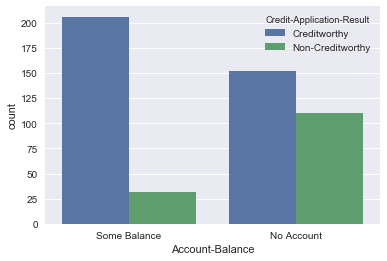

In [8]:
sns.countplot(data["Account-Balance"],hue=data["Credit-Application-Result"])

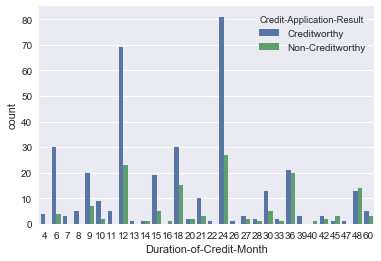

In [9]:
sns.countplot(data["Duration-of-Credit-Month"], hue=data["Credit-Application-Result"])

In [10]:
data.head(1)

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,None,2.0,1,NaN,Other Banks/Depts,2,1,1,2,1,2


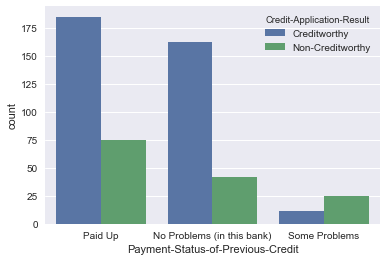

In [11]:
sns.countplot(data["Payment-Status-of-Previous-Credit"], hue=data["Credit-Application-Result"])

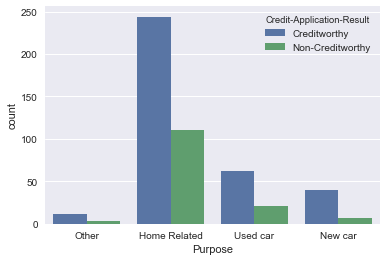

In [12]:
sns.countplot(data["Purpose"], hue=data["Credit-Application-Result"])

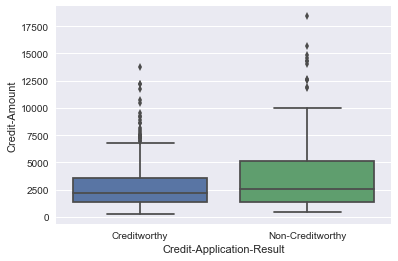

In [13]:
sns.boxplot(y=data["Credit-Amount"], x=data["Credit-Application-Result"])

In [14]:
data.head(1)

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,None,2.0,1,NaN,Other Banks/Depts,2,1,1,2,1,2


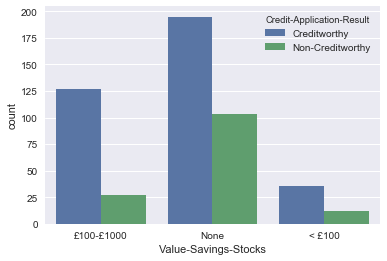

In [15]:
sns.countplot(data["Value-Savings-Stocks"], hue=data["Credit-Application-Result"])

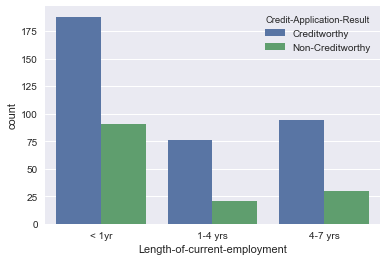

In [16]:
sns.countplot(data["Length-of-current-employment"], hue=data["Credit-Application-Result"])

In [17]:
data.head(1)

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,None,2.0,1,NaN,Other Banks/Depts,2,1,1,2,1,2


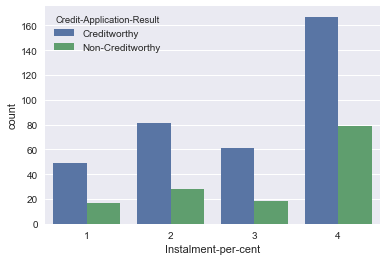

In [18]:
sns.countplot(data["Instalment-per-cent"], hue=data["Credit-Application-Result"])

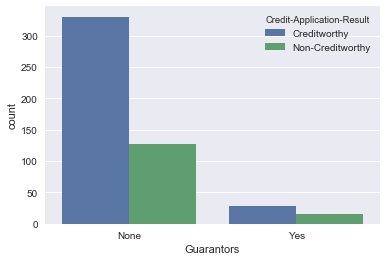

In [19]:
sns.countplot(data["Guarantors"], hue=data["Credit-Application-Result"])

In [20]:
data.head(1)

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,None,2.0,1,NaN,Other Banks/Depts,2,1,1,2,1,2


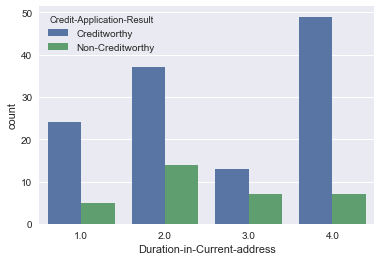

In [21]:
sns.countplot(data["Duration-in-Current-address"], hue=data["Credit-Application-Result"])

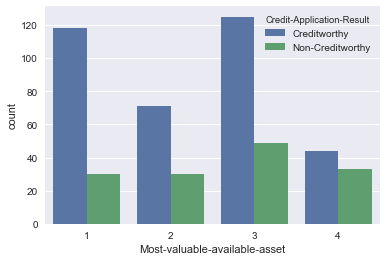

In [22]:
sns.countplot(data["Most-valuable-available-asset"], hue=data["Credit-Application-Result"])

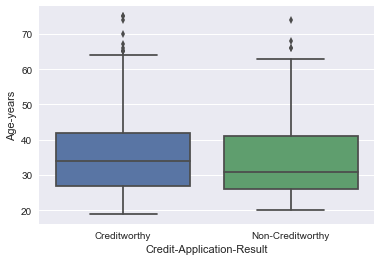

In [23]:
sns.boxplot(y=data["Age-years"], x=data["Credit-Application-Result"])

In [24]:
data.head(1)

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,None,2.0,1,NaN,Other Banks/Depts,2,1,1,2,1,2


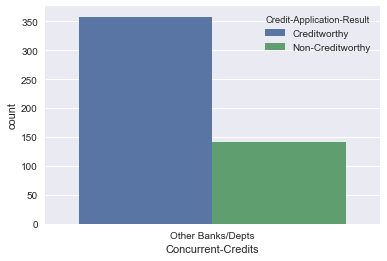

In [25]:
sns.countplot(data["Concurrent-Credits"], hue=data["Credit-Application-Result"])

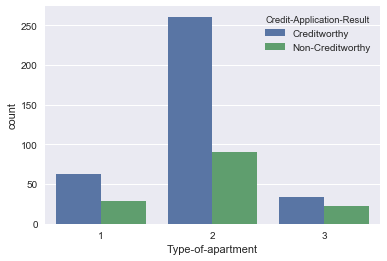

In [26]:
sns.countplot(data["Type-of-apartment"], hue=data["Credit-Application-Result"])

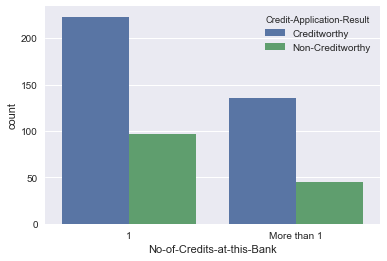

In [27]:
sns.countplot(data["No-of-Credits-at-this-Bank"], hue=data["Credit-Application-Result"])

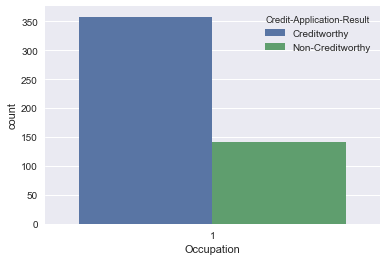

In [28]:
sns.countplot(data["Occupation"], hue=data["Credit-Application-Result"])

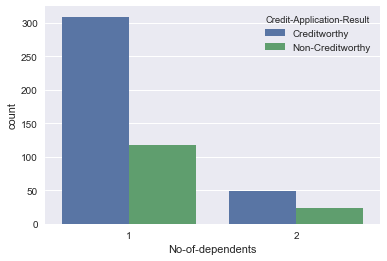

In [29]:
sns.countplot(data["No-of-dependents"], hue=data["Credit-Application-Result"])

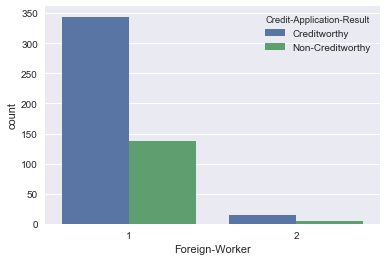

In [30]:
sns.countplot(data["Foreign-Worker"], hue=data["Credit-Application-Result"])

In [31]:
data.head(1)

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,None,2.0,1,NaN,Other Banks/Depts,2,1,1,2,1,2


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
Credit-Application-Result            500 non-null object
Account-Balance                      500 non-null object
Duration-of-Credit-Month             500 non-null int64
Payment-Status-of-Previous-Credit    500 non-null object
Purpose                              500 non-null object
Credit-Amount                        500 non-null int64
Value-Savings-Stocks                 500 non-null object
Length-of-current-employment         500 non-null object
Instalment-per-cent                  500 non-null int64
Guarantors                           500 non-null object
Duration-in-Current-address          156 non-null float64
Most-valuable-available-asset        500 non-null int64
Age-years                            488 non-null float64
Concurrent-Credits                   500 non-null object
Type-of-apartment                    500 non-null int64
No-of-Credits-at-this-Bank           500 no

## data preprocessing
1. drop "Duration-in-Current-address" due to too much missing value
2. dropna "Age-years" or fillna with median for 12 missing records, 
3. get_dummies categorical variables
4. one hot encode numerical variable but have categorical meaning

In [33]:
data = pd.read_excel("credit-data-training.xlsx")
data.drop("Duration-in-Current-address", axis=1, level=None, inplace=True, errors='raise')

# data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
median_age = data["Age-years"].median()
data["Age-years"].fillna(median_age, inplace=True)

In [34]:
measures = ['Duration-of-Credit-Month','Credit-Amount', 'Instalment-per-cent']
dimensions = ['Account-Balance','Payment-Status-of-Previous-Credit','Purpose', 'Value-Savings-Stocks',
    'Length-of-current-employment', 'No-of-dependents','No-of-Credits-at-this-Bank','Type-of-apartment']
# mix = ['Type-of-apartment']

In [35]:
dummies = pd.get_dummies(data[dimensions].astype(str))  # type of apartment has number type
#data = pd.concat([data, dummies], axis = 1)
#data.drop(dimensions, axis=1, level=None, inplace=True, errors='raise')
dummies.shape

(500, 22)

In [36]:
if False:
    from sklearn.preprocessing import OneHotEncoder
    enc = OneHotEncoder()
    enc.fit(data[mix].values)
    hot = enc.transform(data[mix].values).toarray()
    hot.shape

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[measures] = scaler.fit_transform(data[measures])
data[measures].shape

(500, 3)

In [38]:
#features = np.hstack((hot, dummies.values,data[measures].values)).astype(int)
#features = np.hstack((hot, dummies.values,m))
features = pd.concat([dummies, data[measures]],axis=1)  # better use panda because it track the variable names

In [39]:
target = pd.get_dummies(data["Credit-Application-Result"])['Creditworthy']

## train model

In [40]:
features.shape  # 500,25

(500, 25)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 0)

In [42]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [43]:
from sklearn.metrics import accuracy_score
y_predict = model.predict(X_test)
score = accuracy_score(y_test, y_predict)
print("score: ", score)  # 0.63, 0.65 (scale data), 0.75 (fillna)

score:  0.74


In [44]:
topN = 5
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
columns = X_train.columns.values[indices[:topN]]
values = importances[indices][:topN]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

if len(importances) > 5:
    columns = np.append(columns,"other factors")
    values = np.append(values, 1-values.sum())

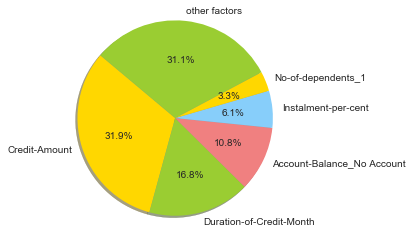

In [45]:
plt.pie(values,labels=columns, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

### other models

In [46]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
score = accuracy_score(y_test, y_predict)
print("score: ", score)  # 0.66, 0.69 (scale data), 0.67 (fillna)

score:  0.673333333333


In [47]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
score = accuracy_score(y_test, y_predict)
print("score: ", score)  # 0.75 (fillna)

score:  0.733333333333


# predict on unseen data

In [48]:
customer = pd.read_excel("customers-to-score.xlsx")

In [49]:
customer.drop("Duration-in-Current-address", axis=1, level=None, inplace=True, errors='raise')

# data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
customer["Age-years"].fillna(median_age, inplace=True)

dummies = pd.get_dummies(data[dimensions].astype(str))
customer[measures] = scaler.transform(customer[measures])
features = pd.concat([dummies, data[measures]],axis=1)

In [50]:
print(dummies.shape)

(500, 22)


**one dummy is missing**, need to compare and fill that

In [51]:
y_predict = model.predict(features)

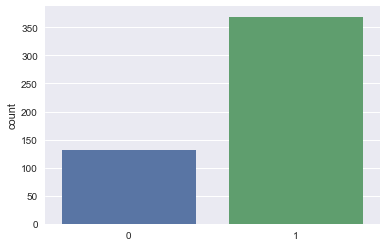

In [52]:
sns.countplot(y_predict)
plt.show()